In [26]:
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\abhis\Desktop\SIH_internal\sih_rockfall_predictor_alert_system\ml_model\data\combined_weather_seismic_realistic_10000.csv")


# Quick check
print(df.head())
print(df['final_label'].value_counts())  # Check class distribution


   temp_c  humidity  pressure_mb  wind_kph  precip_mm  latitude  longitude  \
0    -4.6      66.0       1039.1      15.8        2.8   52.6226   160.6475   
1    10.5      77.0        990.2      18.7       14.4   49.8497   157.0971   
2    29.0      39.0       1044.2       9.7       12.4   51.1324   159.1921   
3    38.0     100.0       1006.5      23.8        4.6   49.9205   158.6058   
4    29.9      88.0       1049.0       9.3       17.6    1.0741   125.5414   

   depth_km  magnitude  final_label  
0    24.270        4.6            1  
1    24.164        4.3            2  
2    29.392        4.4            2  
3    10.000        4.7            2  
4    79.622        4.5            2  
final_label
2    8548
1    1359
0      93
Name: count, dtype: int64


In [28]:
X = df[['temp_c', 'humidity', 'pressure_mb', 'wind_kph', 'precip_mm' , 'latitude', 'longitude' , 'depth_km','magnitude']]  # Features
y = df['final_label']  # Target


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


In [32]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[  14    2    2]
 [   1  252   19]
 [   0    4 1706]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.98      0.93      0.95       272
           2       0.99      1.00      0.99      1710

    accuracy                           0.99      2000
   macro avg       0.97      0.90      0.93      2000
weighted avg       0.99      0.99      0.99      2000



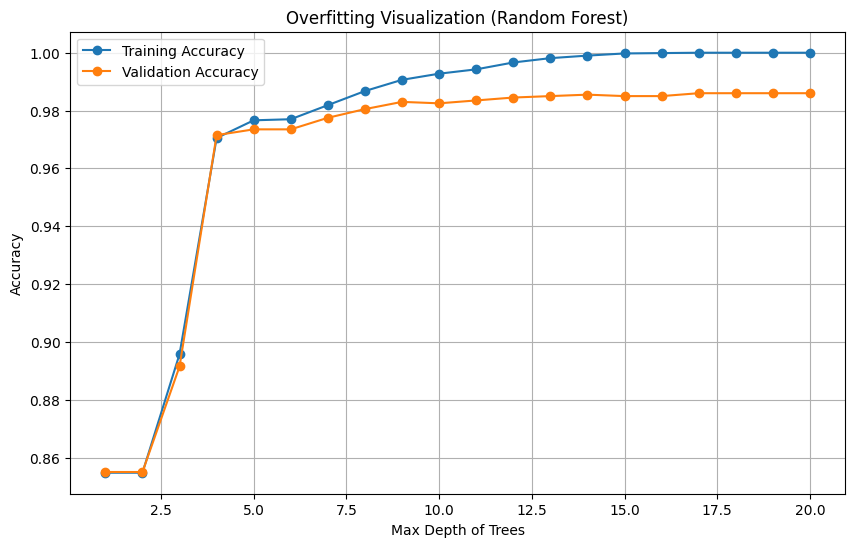

In [33]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Lists to store scores
train_scores = []
test_scores = []
depth_range = range(1, 21)  # Try different max_depth values

# Train multiple models with different max_depth
for depth in depth_range:
    rf = RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=depth
    )
    rf.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, label="Training Accuracy", marker='o')
plt.plot(depth_range, test_scores, label="Validation Accuracy", marker='o')
plt.xlabel("Max Depth of Trees")
plt.ylabel("Accuracy")
plt.title("Overfitting Visualization (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
import joblib

joblib.dump(clf, "env_rockfall_model_final.pkl")
# joblib.dump(scaler, "scaler.pkl")  # Save scaler if you used scaling
print("✅ Model and scaler saved.")


✅ Model and scaler saved.
